<a href="https://colab.research.google.com/github/pachterlab/CWGFLHGCCHAP_2021/blob/master/notebooks/Extras/scrubletAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!date

Fri Apr 30 18:56:17 UTC 2021


### **Download Data**

In [1]:
#Install kallisto and bustools

!wget --quiet https://github.com/pachterlab/kallisto/releases/download/v0.46.2/kallisto_linux-v0.46.2.tar.gz
!tar -xf kallisto_linux-v0.46.2.tar.gz
!cp kallisto/kallisto /usr/local/bin/

!wget --quiet https://github.com/BUStools/bustools/releases/download/v0.40.0/bustools_linux-v0.40.0.tar.gz
!tar -xf bustools_linux-v0.40.0.tar.gz
!cp bustools/bustools /usr/local/bin/

In [2]:
import requests
from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
    url = 'https://api.datacite.org/dois/'+doi+'/media'
    r = requests.get(url).json()
    netcdf_url = r['data'][0]['attributes']['url']
    r = requests.get(netcdf_url,stream=True)
    #Set file name
    fname = doi.split('/')[-1]+ext
    #Download file with progress bar
    if r.status_code == 403:
        print("File Unavailable")
    if 'content-length' not in r.headers:
        print("Did not get file")
    else:
        with open(fname, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            pbar = tnrange(int(total_length/1024), unit="B")
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    pbar.update()
                    f.write(chunk)
        return fname

In [3]:
#Get reference data () fastq's)

#Trinity Transcripts
download_file('10.22002/D1.1825','.gz')

#Gff3 (Trinity)
download_file('10.22002/D1.1824','.gz')



<ipython-input-2-3d0e4fc72fc7>:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  pbar = tnrange(int(total_length/1024), unit="B")


  0%|          | 0/23757 [00:00<?, ?B/s]

  0%|          | 0/4972 [00:00<?, ?B/s]

'D1.1824.gz'

In [4]:
# Get doi links for all Starvation cDNA fastq.gz files
starvFiles = []
dois = ['10.22002/D1.1840','10.22002/D1.1841','10.22002/D1.1842','10.22002/D1.1843',
        '10.22002/D1.1844','10.22002/D1.1845','10.22002/D1.1846','10.22002/D1.1847',
        '10.22002/D1.1848','10.22002/D1.1849','10.22002/D1.1850','10.22002/D1.1851',
        '10.22002/D1.1852','10.22002/D1.1853','10.22002/D1.1854','10.22002/D1.1855'] #16 doi numbers
for doi in dois:
  url = 'https://api.datacite.org/dois/'+doi+'/media'
  r = requests.get(url).json()
  netcdf_url = r['data'][0]['attributes']['url']

  starvFiles += [netcdf_url]

s1 = starvFiles[0]
s2 = starvFiles[1]
s3 = starvFiles[2]
s4 = starvFiles[3]
s5 = starvFiles[4]
s6 = starvFiles[5]
s7 = starvFiles[6]
s8 = starvFiles[7]

s9 = starvFiles[8]
s10 = starvFiles[9]
s11 = starvFiles[10]
s12 = starvFiles[11]
s13 = starvFiles[12]
s14 = starvFiles[13]
s15 = starvFiles[14]
s16 = starvFiles[15]

In [5]:
# Get doi links for all Stimulation cDNA fastq.gz files
stimFiles = []
dois = ['10.22002/D1.1860','10.22002/D1.1863','10.22002/D1.1864','10.22002/D1.1865',
        '10.22002/D1.1866','10.22002/D1.1868','10.22002/D1.1870','10.22002/D1.1871'] #8 numbers
for doi in dois:
  url = 'https://api.datacite.org/dois/'+doi+'/media'
  r = requests.get(url).json()
  netcdf_url = r['data'][0]['attributes']['url']

  stimFiles += [netcdf_url]


stim1 = stimFiles[0]
stim2 = stimFiles[1]
stim3 = stimFiles[2]
stim4 = stimFiles[3]
stim5 = stimFiles[4]
stim6 = stimFiles[5]
stim7 = stimFiles[6]
stim8 = stimFiles[7]


In [6]:
#Get original, CellRanger clustered starvation adata
download_file('10.22002/D1.1798','.gz')

#Cell barcodes selected from Stim ClickTags
download_file('10.22002/D1.1817','.gz')



<ipython-input-2-3d0e4fc72fc7>:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  pbar = tnrange(int(total_length/1024), unit="B")


  0%|          | 0/45376 [00:00<?, ?B/s]

  0%|          | 0/183 [00:00<?, ?B/s]

'D1.1817.gz'

In [7]:
!gunzip *.gz

In [8]:
!pip install --quiet anndata
!pip install --quiet scanpy
!pip install --quiet louvain
!pip install scrublet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552450 sha256=4bea572f5b97ed710e02be62e8826238ec6cfe8171bb2860c9c9f5fdc3e62ac5
  Stored in directory: /root/.cache/

### **Import Packages**

In [9]:
import pandas as pd
import anndata
import scanpy as sc
import numpy as np
import scipy.sparse

import scrublet as scr

import matplotlib.pyplot as plt
%matplotlib inline
sc.set_figure_params(dpi=125)

### **Run kallisto bus on data with Starvation cDNA data**



In [ ]:
#Make Kallisto index (referene https://www.kallistobus.tools/getting_started)
!mv D1.1825 transcripts.fa
!kallisto index -i clytia_trin.idx -k 31 transcripts.fa


[build] loading fasta file transcripts.fa
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 30 target sequences
[build] warning: replaced 205989 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
[build] counting k-mers ... tcmalloc: large alloc 1610612736 bytes == 0x692da000 @  0x7f1a409fc1e7 0x6f46bd 0x6f4739 0x4af899 0x4a7a68 0x4aec09 0x44e175 0x7f1a3fa18bf7 0x452f19
done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 410850 contigs and contains 61068880 k-mers 



Run kallisto for one set of samples

In [ ]:
#Create BUS files from fastq's, can't do separate lines
!mkfifo R1.gz R2.gz R1_02.gz R2_02.gz R1_03.gz R2_03.gz R1_04.gz R2_04.gz; curl -Ls $s1 > R1.gz & curl -Ls $s2 > R2.gz & curl -Ls $s3 > R1_02.gz & curl -Ls $s4 > R2_02.gz & curl -Ls $s5 > R1_03.gz & curl -Ls $s6 > R2_03.gz & curl -Ls $s7 > R1_04.gz & curl -Ls $s8 > R2_04.gz & kallisto bus -i clytia_trin.idx -o bus_output/ -x 10xv2 -t 2 R1.gz R2.gz R1_02.gz R2_02.gz R1_03.gz R2_03.gz R1_04.gz R2_04.gz



[index] k-mer length: 31
[index] number of targets: 113,915
[index] number of k-mers: 61,068,880
tcmalloc: large alloc 1610612736 bytes == 0x2ef0000 @  0x7f116ba8f1e7 0x6f46bd 0x6f4739 0x4af899 0x4a9a10 0x44e2bc 0x7f116aaabbf7 0x452f19
[index] number of equivalence classes: 245,726
[quant] will process sample 1: R1.gz
                               R2.gz
[quant] will process sample 2: R1_02.gz
                               R2_02.gz
[quant] will process sample 3: R1_03.gz
                               R2_03.gz
[quant] will process sample 4: R1_04.gz
                               R2_04.gz
[quant] finding pseudoalignments for the reads ... done
[quant] processed 219,421,150 reads, 188,296,358 reads pseudoaligned



In [ ]:
#Generate gene-count matrices
!wget --quiet https://github.com/bustools/getting_started/releases/download/getting_started/10xv2_whitelist.txt

#Make t2g file
!mv D1.1824 trinity.gff3
!awk '{ print $12"\t"$10}' trinity.gff3  > t2g_rough.txt
!sed 's/[";]//g' t2g_rough.txt > t2g_trin.txt




In [ ]:
#!cd bus_output/
!mkdir bus_output/genecount/ bus_output/tmp/

!bustools correct -w 10xv2_whitelist.txt -p bus_output/output.bus | bustools sort -T bus_output/tmptmp/ -t 2 -p - | bustools count -o bus_output/genecount/genes -g t2g_trin.txt -e bus_output/matrix.ec -t bus_output/transcripts.txt --genecounts -

Found 737280 barcodes in the whitelist
Processed 188296358 BUS records
In whitelist = 179043072
Corrected = 3009765
Uncorrected = 6243521
Read in 182052837 BUS records


Run kallisto for other sample set

In [ ]:
#Create BUS files from fastq's
!mkfifo R1_new.gz R2_new.gz R1_02_new.gz R2_02_new.gz R1_03_new.gz R2_03_new.gz R1_04_new.gz R2_04_new.gz; curl -Ls $s9 > R1_new.gz & curl -Ls $s10 > R2_new.gz & curl -Ls $s11 > R1_02_new.gz & curl -Ls $s12 > R2_02_new.gz & curl -Ls $s13 > R1_03_new.gz & curl -Ls $s14 > R2_03_new.gz & curl -Ls $s15 > R1_04_new.gz & curl -Ls $s16 > R2_04_new.gz & kallisto bus -i clytia_trin.idx -o bus_output_02/ -x 10xv2 -t 2 R1_new.gz R2_new.gz R1_02_new.gz R2_02_new.gz R1_03_new.gz R2_03_new.gz R1_04_new.gz R2_04_new.gz


[index] k-mer length: 31
[index] number of targets: 113,915
[index] number of k-mers: 61,068,880
tcmalloc: large alloc 1610612736 bytes == 0x2c52000 @  0x7fb75ff611e7 0x6f46bd 0x6f4739 0x4af899 0x4a9a10 0x44e2bc 0x7fb75ef7dbf7 0x452f19
[index] number of equivalence classes: 245,726
[quant] will process sample 1: R1_new.gz
                               R2_new.gz
[quant] will process sample 2: R1_02_new.gz
                               R2_02_new.gz
[quant] will process sample 3: R1_03_new.gz
                               R2_03_new.gz
[quant] will process sample 4: R1_04_new.gz
                               R2_04_new.gz
[quant] finding pseudoalignments for the reads ... done
[quant] processed 245,357,482 reads, 211,673,174 reads pseudoaligned



In [ ]:
#Generate gene-count matrices
!cd bus_output_02/
!mkdir bus_output_02/genecount/ bus_output_02/tmp/

!bustools correct -w 10xv2_whitelist.txt -p bus_output_02/output.bus | bustools sort -T bus_output_02/tmp/ -t 2 -p -  | bustools count -o bus_output_02/genecount/genes -g t2g_trin.txt -e bus_output_02/matrix.ec -t bus_output_02/transcripts.txt --genecounts -

Found 737280 barcodes in the whitelist
Processed 211673174 BUS records
In whitelist = 201242063
Corrected = 3408308
Uncorrected = 7022803
Read in 204650371 BUS records


Merge matrices (Add -1 to first and -2 to second dataset)

In [ ]:
path = "bus_output/genecount/"
jelly_adata_01 = sc.read(path+'genes.mtx', cache=True)
jelly_adata_01.var_names = pd.read_csv(path+'genes.genes.txt', header=None)[0]
jelly_adata_01.obs_names = pd.read_csv(path+'genes.barcodes.txt', header=None)[0]

jelly_adata_01.obs_names = [i+"-1" for i in jelly_adata_01.obs_names]

In [ ]:
path = "bus_output_02/genecount/"
jelly_adata_02 = sc.read(path+'genes.mtx', cache=True)
jelly_adata_02.var_names = pd.read_csv(path+'genes.genes.txt', header=None)[0]
jelly_adata_02.obs_names = pd.read_csv(path+'genes.barcodes.txt', header=None)[0]

jelly_adata_02.obs_names = [i+"-2" for i in jelly_adata_02.obs_names]

In [ ]:
jelly_adata = jelly_adata_01.concatenate(jelly_adata_02,join='outer', index_unique=None)
jelly_adata_01

AnnData object with n_obs × n_vars = 479562 × 46716

In [ ]:
sc.pp.filter_cells(jelly_adata_01, min_counts=10)
sc.pp.filter_genes(jelly_adata_01, min_counts=5)
jelly_adata_01

AnnData object with n_obs × n_vars = 89456 × 18722
    obs: 'n_counts'
    var: 'n_counts'

In [ ]:
sc.pp.filter_cells(jelly_adata_02, min_counts=10)
sc.pp.filter_genes(jelly_adata_02, min_counts=5)
jelly_adata_02

AnnData object with n_obs × n_vars = 81310 × 18875
    obs: 'n_counts'
    var: 'n_counts'

In [ ]:
cellR = anndata.read('D1.1798')
cells = list(cellR.obs_names)

In [ ]:
len(set(cells).intersection(jelly_adata_01.obs_names))/len(cells)

0.501206757843926

In [ ]:
len(set(cells).intersection(jelly_adata_02.obs_names))/len(cells)

0.498793242156074

Check doublets detected by scrublet

In [ ]:
scrub = scr.Scrublet(jelly_adata_01.X, expected_doublet_rate=0.06,n_neighbors=0.5*np.sqrt(len(jelly_adata_01.obs_names)))


In [ ]:
scrub.call_doublets(threshold=0.4)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=5,
                                                          min_cells=5,
                                                          min_gene_variability_pctl=85,
                                                          n_prin_comps=30)

Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.5%
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.31
Detected doublet rate = 2.1%
Estimated detectable doublet fraction = 25.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 8.2%
Elapsed time: 265.9 seconds


Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.5%


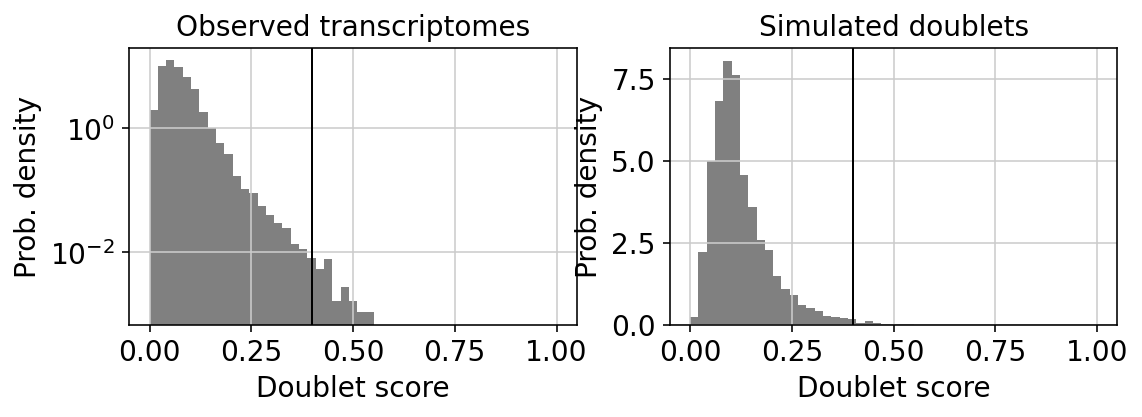

In [ ]:
#scrub.call_doublets(threshold=0.4)
scrub.plot_histogram();

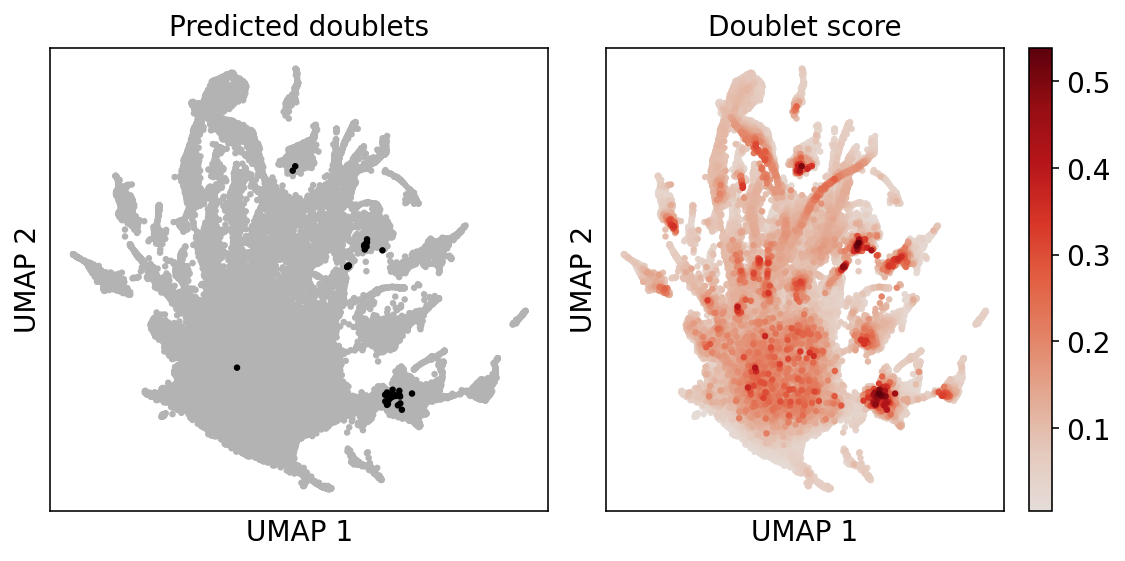

In [ ]:

scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))


scrub.plot_embedding('UMAP', order_points=True);

Compare 'doublets' with filtered cells (look for overlap)

In [ ]:
len(cellR[cellR.obs['louvain'] == '10'].obs_names)


485

In [ ]:
len(set(cellR[cellR.obs['louvain'] == '10'].obs_names).intersection(jelly_adata_01.obs_names[predicted_doublets]))/len(cellR[cellR.obs['louvain'] == '10'].obs_names)

0.0

In [ ]:
len(set(jelly_adata_01.obs_names[predicted_doublets]).intersection(cellR.obs_names))/len(jelly_adata_01.obs_names[predicted_doublets])

0.15132275132275133

Repeat for second sample

In [ ]:
scrub = scr.Scrublet(jelly_adata_02.X, expected_doublet_rate=0.06,n_neighbors=0.5*np.sqrt(len(jelly_adata_02.obs_names)))


In [ ]:
scrub.call_doublets(threshold=0.4)
doublet_scores2, predicted_doublets2 = scrub.scrub_doublets(min_counts=5,
                                                          min_cells=5,
                                                          min_gene_variability_pctl=85,
                                                          n_prin_comps=30)

Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 5.2%
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.29
Detected doublet rate = 2.4%
Estimated detectable doublet fraction = 30.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 7.8%
Elapsed time: 210.9 seconds


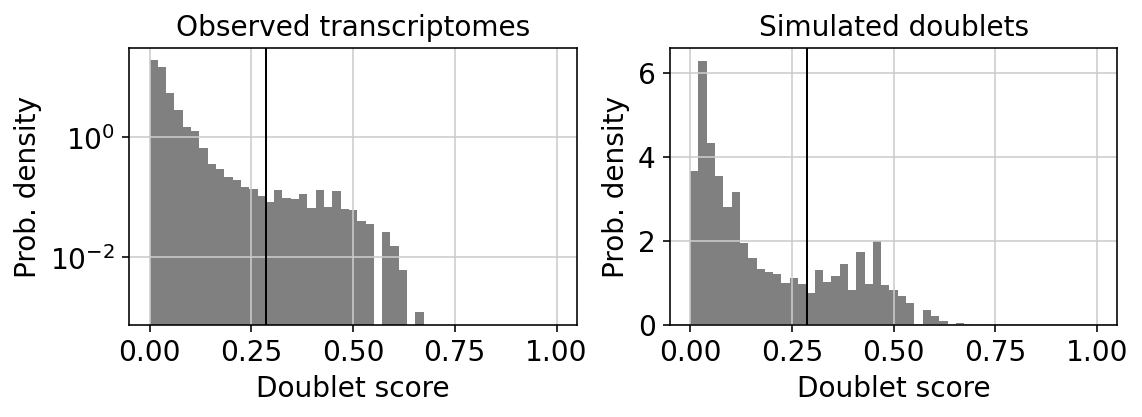

In [ ]:
#scrub.call_doublets(threshold=0.4)
scrub.plot_histogram();

Compare 'doublets' with filtered cells (look for overlap)

In [ ]:
len(jelly_adata_02.obs_names[predicted_doublets2])


1930

In [ ]:
len(set(cellR[cellR.obs['louvain'] == '10'].obs_names).intersection(jelly_adata_02.obs_names[predicted_doublets2]))/len(cellR[cellR.obs['louvain'] == '10'].obs_names)

0.0

In [ ]:
len(set(jelly_adata_02.obs_names[predicted_doublets2]).intersection(cellR.obs_names))/len(jelly_adata_02.obs_names[predicted_doublets2])

0.17046632124352332

Filter cell barcodes by previous selection done with ClickTag counts

In [ ]:
# # Filter barcodes by 'real' cells
# cellR = anndata.read('D1.1798')
# cells = list(cellR.obs_names)

# jelly_adata = jelly_adata[cells,:]
# jelly_adata

View of AnnData object with n_obs × n_vars = 13673 × 46716
    obs: 'batch'

In [ ]:
# jelly_adata.write('fedStarved_raw.h5ad')

### **Run kallisto bus on data with Stimulation cDNA data**




Run kallisto for one set of samples

In [ ]:
#Create BUS files from fastq's, can't do separate lines
!mkfifo R1_stim.gz R2_stim.gz R1_02_stim.gz R2_02_stim.gz ; curl -Ls $stim1 > R1_stim.gz & curl -Ls $stim2 > R2_stim.gz & curl -Ls $stim3 > R1_02_stim.gz & curl -Ls $stim4 > R2_02_stim.gz & kallisto bus -i clytia_trin.idx -o bus_output/ -x 10xv3 -t 2 R1_stim.gz R2_stim.gz R1_02_stim.gz R2_02_stim.gz



In [ ]:
#Generate gene-count matrices
!wget --quiet https://github.com/bustools/getting_started/releases/download/getting_started/10xv3_whitelist.txt


In [ ]:
#!cd bus_output/
!mkdir bus_output/genecount/ bus_output/tmp/

!bustools correct -w 10xv3_whitelist.txt -p bus_output/output.bus | bustools sort -T bus_output/tmptmp/ -t 2 -p - | bustools count -o bus_output/genecount/genes -g t2g_trin.txt -e bus_output/matrix.ec -t bus_output/transcripts.txt --genecounts -

In [ ]:
!ls test

Run kallisto for other sample set

In [ ]:
#Create BUS files from fastq's

!mkfifo R1_stim2.gz R2_stim2.gz R1_02_stim2.gz R2_02_stim2.gz ; curl -Ls $stim5 > R1_stim2.gz & curl -Ls $stim6 > R2_stim2.gz & curl -Ls $stim7 > R1_02_stim2.gz & curl -Ls $stim8 > R2_02_stim2.gz & kallisto bus -i clytia_trin.idx -o bus_output_02/ -x 10xv3 -t 2 R1_stim2.gz R2_stim2.gz R1_02_stim2.gz R2_02_stim2.gz


In [ ]:
#Generate gene-count matrices
!cd bus_output_02/
!mkdir bus_output_02/genecount/ bus_output_02/tmp/

!bustools correct -w 10xv3_whitelist.txt -p bus_output_02/output.bus | bustools sort -T bus_output_02/tmp/ -t 2 -p -  | bustools count -o bus_output_02/genecount/genes -g t2g_trin.txt -e bus_output_02/matrix.ec -t bus_output_02/transcripts.txt --genecounts -

Merge matrices (Add -1 to first and -2 to second dataset)

In [ ]:
path = "bus_output/genecount/"
jelly_adata_01 = sc.read(path+'genes.mtx', cache=True)
jelly_adata_01.var_names = pd.read_csv(path+'genes.genes.txt', header=None)[0]
jelly_adata_01.obs_names = pd.read_csv(path+'genes.barcodes.txt', header=None)[0]

jelly_adata_01.obs_names = [i+"-1" for i in jelly_adata_01.obs_names]

In [ ]:
path = "bus_output_02/genecount/"
jelly_adata_02 = sc.read(path+'genes.mtx', cache=True)
jelly_adata_02.var_names = pd.read_csv(path+'genes.genes.txt', header=None)[0]
jelly_adata_02.obs_names = pd.read_csv(path+'genes.barcodes.txt', header=None)[0]

jelly_adata_02.obs_names = [i+"-2" for i in jelly_adata_02.obs_names]

In [ ]:
jelly_adata = jelly_adata_01.concatenate(jelly_adata_02,join='outer', index_unique=None)

Filter cell barcodes by previous filtering done with ClickTag counts

In [ ]:
# Filter barcodes by 'real' cells
!mv D1.1817 jelly4stim_individs_tagCells_50k.mat
barcodes_list = sio.loadmat('jelly4stim_individs_tagCells_50k.mat')
barcodes_list.pop('__header__', None)
barcodes_list.pop('__version__', None)
barcodes_list.pop('__globals__', None)

# Add all cell barcodes for each individual
barcodes = []
for b in barcodes_list:
    if barcodes_list[b] != "None":
        barcodes.append(b)

print(len(barcodes))

barcodes = [s.replace('-1', '-3') for s in barcodes]
barcodes = [s.replace('-2', '-1') for s in barcodes]
barcodes = [s.replace('-3', '-2') for s in barcodes]


In [ ]:
jelly_adata = jelly_adata[barcodes,:]

In [ ]:
jelly_adata.write('stimulation_raw.h5ad')